In [24]:
# important libraries
import random    
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import numpy as np

### MonteCarlo methods for pricing asian options:

In [2]:
# Generate St(k+1)/Stk
def Genere_Stk(pas,sigma,r): 
    W=random.gauss(0,pas**0.5)
    return(m.exp(sigma*W-0.5*(sigma*sigma)*pas+r*pas))

In [3]:
# First method:
def Approx1(M,N,T,K,r,sigma,S0):
    S=0
    h=T/N
    v=[] #Stocker chaque itération dans v
    for i in range(M):
        S1=S0
        Y=S1
        for j in range(1,N):
            x=Genere_Stk(h,sigma,r)*S1
            Y+=x
            S1=x
        Y=(h/T)*Y
        v.append(m.exp(-r*T)*max(Y-K,0))
        S += max(Y-K,0)
    S=m.exp(-r*T)/M*S
    return(S,v)

In [37]:
Approx1(1000,365,0.5,105,0.05,0.3,100)

(3.4918713997464006,
 [9.530702800968607,
  0.0,
  12.607156661766991,
  12.246315246921919,
  0.0,
  0.0,
  11.456070686500638,
  6.300982416464695,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  19.18061774919828,
  5.203338501143822,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  8.154198816100376,
  17.796671902803514,
  0.0,
  0.0,
  32.64528913916525,
  7.080614438928502,
  18.4885990972193,
  18.445827094179677,
  0.0,
  0.0,
  3.6984770504767344,
  0.0,
  0.0,
  4.110084411719503,
  0.0,
  0.0,
  0.0,
  29.205375283889126,
  6.104569170212463,
  15.20980554381982,
  15.093384824866522,
  2.9577812931550063,
  0.0,
  1.4746847904316676,
  0.0,
  0.0,
  1.410259405779575,
  0.0,
  27.64848390900247,
  12.547834919090594,
  0.0,
  6.59310097397002,
  0.0,
  0.0,
  2.0596783198952813,
  0.0,
  0.0,
  4.952562066032921,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  11.741421394549263,
  0.0,
  0.0,
  0.0,
  10.856514944265138,
  3.8197283290241675,
  0.0,
  5.074241889091932,
  0.0,
  0.0,
  14.715395333

In [7]:
# Second method:
def Approx2(M,N,T,K,r,sigma,S0):
    S=0
    h=T/N
    v=[]
    for i in range(M):
        Y=S0
        S1=S0
        for j in range(1,N):
            W=random.gauss(0,h**0.5)
            St=m.exp(sigma*W-0.5*(sigma*sigma)*h+r*h)*S1
            Y+=St*(1+r*h*0.5+sigma*W*0.5)
            S1=St
        Y=(h/T)*Y
        v.append(m.exp(-r*T)*max(Y-K,0))
        S+= max(Y-K,0)
    S=m.exp(-r*T)/M*S
    return(S,v)

In [ ]:
Approx2(1000,5000,1,100,0.02,0.05,100)

In [10]:
# Third method:
def Approx3(M,N,T,K,r,sigma,S0,R):
    S=0
    h=T/N
    v=[]
    for i in range(M):
        Y=0
        Wtk=0
        Wtk1=0
        for j in range(N):
            W=random.gauss(0,h**0.5)
            Wtk=Wtk1
            Wtk1=W+Wtk
            St=S0*m.exp(sigma*Wtk-0.5*(sigma*sigma)*j*h+r*j*h)
            L=0
            for k in range(R):
                # We evaluate the integral of Wu by a Remanian sum:
                L+= random.gauss(((j+1)*h-j*h+h/R*k)/h*Wtk+(j*h+h/R*k-j*h)/h*Wtk1,(((j+1)*h-j*h+h/R*k)*(j*h+h/R*k-j*h)/h)**0.5)
            Y+= St*(h+r*h*h/2+(sigma*(h/R*L-h*Wtk)))
        Y=Y/T
        v.append(m.exp(-r*T)*max(Y-K,0))
        S+= max(Y-K,0)
    S=m.exp(-r*T)/M*S
    return(S,v)

In [ ]:
print(Approx3(100,100,0.5,90,0.03,0.2,100,100))

In [4]:
# Confidence Interval:
def IC(M,N,T,K,r,sigma,S0,alpha,store,R=0):
    if store==1:
        s,v=Approx1(M,N,T,K,r,sigma,S0)
    elif store==2:
        s,v=Approx2(M,N,T,K,r,sigma,S0)
    elif store==3:
        s,v=Approx3(M,N,T,K,r,sigma,S0,R)
    std=0
    for i in range(M):
        std+= (v[i]-s)**2
    std=1/(M-1)*std
    std=std**0.5
    quantile1 = norm.ppf(alpha/2, loc=0, scale=1)
    quantile2 = norm.ppf(1-alpha/2, loc=0, scale=1)
    inf= s+(quantile1*std)/(M**0.5)
    sup= s+(quantile2*std)/(M**0.5)
    return([inf,sup],s)

In [5]:
IC(1000,1000,1,90,0.05,0.02,100,0.05,1)

([11.825612588243287, 11.962806856222146], 11.894209722232716)

In [8]:
IC(1000,1000,1,90,0.05,0.02,100,0.05,2)

([11.83013375226479, 11.966643491232968], 11.898388621748879)

In [11]:
print(IC(1000,100,1,105,0.05,0.3,100,0.05,3,100))

([13.483826514956796, 16.561414010680526], 15.022620262818661)


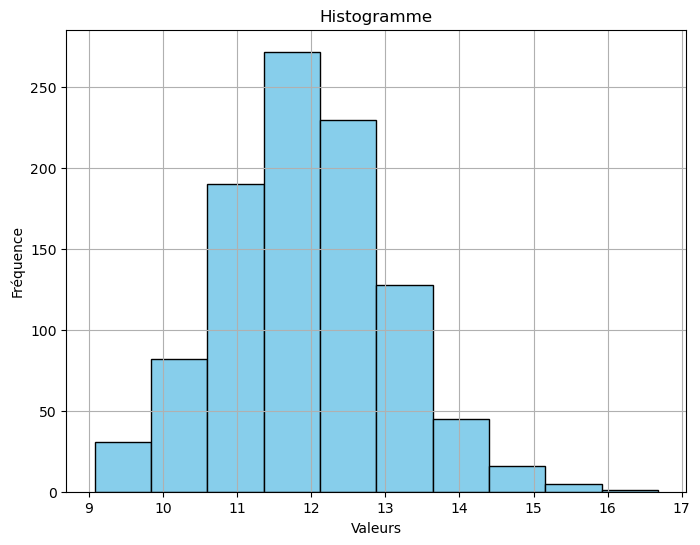

In [12]:
# Histogram of the MonteCarlo simulation:
def plot_histogram(data, title='Histogramme', xlabel='Valeurs', ylabel='Fréquence', bins=10, color='skyblue', edgecolor='black'):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, color=color, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
plot_histogram(Approx1(1000,1000,1,90,0.05,0.02,100)[1] , title='Histogramme', xlabel='Valeurs', ylabel='Fréquence', bins=10, color='skyblue', edgecolor='black')

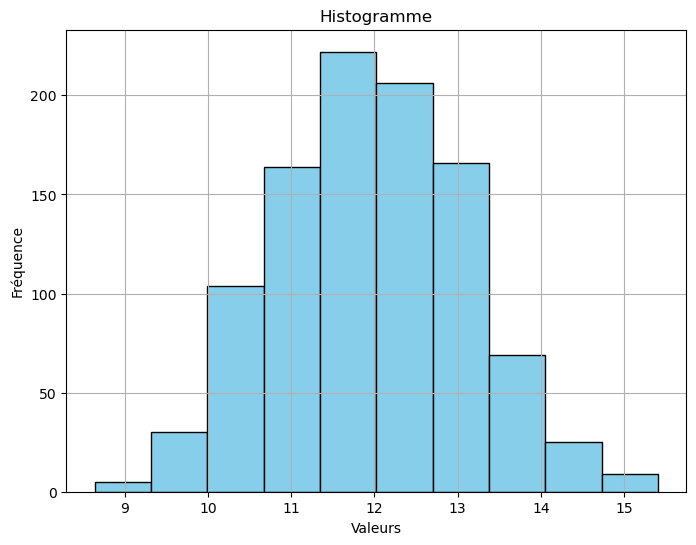

In [13]:
plot_histogram(Approx2(1000,1000,1,90,0.05,0.02,100)[1] , title='Histogramme', xlabel='Valeurs', ylabel='Fréquence', bins=10, color='skyblue', edgecolor='black')

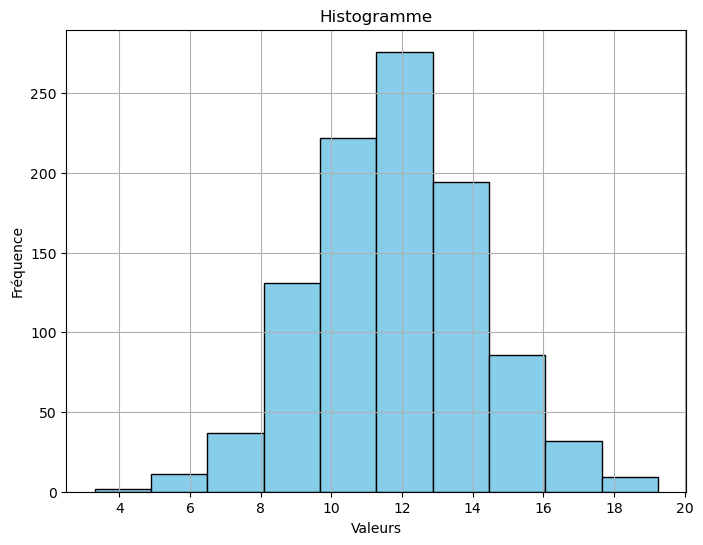

In [14]:
plot_histogram(Approx3(1000,100,1,90,0.05,0.02,100,100)[1] , title='Histogramme', xlabel='Valeurs', ylabel='Fréquence', bins=10, color='skyblue', edgecolor='black')

In [16]:
# European option formula:
def option_europe(T,K,r,sigma,S0):
    d1=1/(sigma*T**0.5)*(m.log(S0/K)+(r+0.5*sigma**2)*T)
    F1=norm.cdf(d1)
    d2= d1 - sigma*T**0.5
    F2=norm.cdf(d2)
    return(S0*F1 - F2*K*m.exp(-r*T))

In [17]:
option_europe(0.252,25,0.0049,0.0094,183)

158.0308509487043

## Estimatig the volatility on real world data:

### Data preprocessing:

In [18]:
# Testing on real data (Apple)
df=pd.read_csv("HistoricalData_1707752630899.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/09/2024,$188.85,45155220,$188.65,$189.99,$188.00
1,02/08/2024,$188.32,40962050,$189.385,$189.535,$187.35
2,02/07/2024,$189.41,53438960,$190.64,$191.05,$188.61
3,02/06/2024,$189.30,43490760,$186.86,$189.31,$186.7695
4,02/05/2024,$187.68,69668820,$188.15,$189.25,$185.84


In [19]:
print("Column Names:", df.columns)
len(df)

Column Names: Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


250

In [20]:
data=df['Open'].str.replace('$','')
data=pd.to_numeric(data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11692\1681331404.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data=df['Open'].str.replace('$','')


In [21]:
data=data.tolist()
data.reverse()

In [31]:
def transforme_log(data):
    data1=[]
    for i in range(len(data)-1):
        data1.append(data[i+1]/data[i])
    data1 = [m.log(x) for x in data1]
    return(data1)
data1=transforme_log(data)

### Volatility estimation:

In [25]:
# Estimating the volatility of the Black-Scholes model:
moy = sum(data1) / len(data1)
s=0
for i in range(len(data1)):
    s+=(data1[i]-moy)**2
s=(s/(len(data1)-1))

In [26]:
h=1/365
sigma=(s/h)**0.5

In [27]:
mu=moy/h+0.5*sigma**2
print(mu)

0.3579399819991386


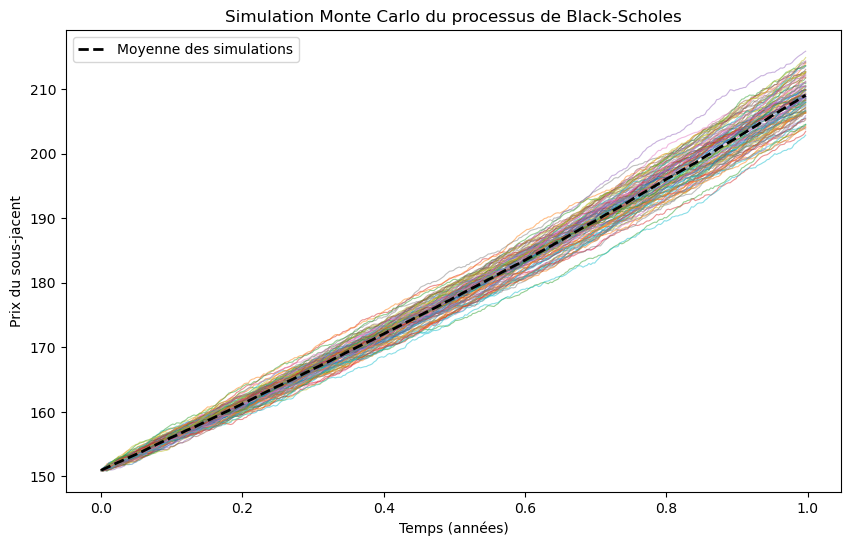

In [28]:
# Simulating different possible trajectories:
def black_scholes_simulation(S0, mu, sigma, T, num_paths, num_steps):
    dt = T / num_steps
    
    # Générer des trajectoires aléatoires pour le mouvement brownien
    W = np.random.normal(0, np.sqrt(dt), size=(num_paths, num_steps-1))
    
    # Calculer les prix du sous-jacent pour chaque trajectoire
    t = np.arange(0, T, dt)
    S = S0 * np.exp(np.cumsum((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * W, axis=1))
    
    # Ajouter le prix initial à chaque trajectoire
    S = np.column_stack([np.full(num_paths, S0), S])
    
    # Calculer la moyenne des trajectoires
    mean_S = np.mean(S, axis=0)
    
    return t, S, mean_S

# Paramètres
S0 =data[0]   # Prix initial du sous-jacent
T = 1       # Maturité de l'option en années
num_paths = 100 # Nombre de trajectoires simulées
num_steps = 365   # Nombre de pas dans la simulation (252 jours de trading par an)

# Simuler le processus de Black-Scholes
t, S, mean_S = black_scholes_simulation(S0, mu, sigma, T, num_paths, num_steps)

# Tracer les trajectoires et la moyenne
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(t, S[i], lw=0.8, alpha=0.5)
plt.plot(t, mean_S, color='black', linestyle='dashed', linewidth=2, label='Moyenne des simulations')
plt.xlabel('Temps (années)')
plt.ylabel('Prix du sous-jacent')
plt.title('Simulation Monte Carlo du processus de Black-Scholes')
plt.legend()
plt.show()

## Variance reduction method:

In [3]:
# Creating a brownian process:
def brownian_motion(T, N):
    dt = T/N
    t = np.linspace(0.0, T, N+1)
    W = np.zeros(N+1)
    W[0] = 0.0
    for i in range(1, N+1):
        dW = np.random.normal(loc=0.0, scale=np.sqrt(dt))
        W[i] = W[i-1] + dW
    return W

In [29]:
def brownian_sum(t,R): #Sum of a brownian process
    W=sum(brownian_motion(t,R))
    return(W)

In [34]:
def Simuler_Zp(S0,T,N,r,sigma,w):
    h=T/N
    return(m.log(S0)+(h*sigma*w/T+r*0.5*T-sigma*sigma*0.25*T))

In [36]:
# Control variable
def f(T,r,K,x):
    return(m.exp(-r*T)*max((m.exp(x)-K),0))

In [37]:
def monte(S0,T,r,sigma,K,M,N):
    s=0
    v=[]
    for i in  range(M):
        x=Simuler_Zp(S0,T,N,r,sigma)
        v.append(f(T,r,K,x))
        s+= f(T,r,K,x)
    return(s/M,v) 

In [9]:
# Expectancy of the control variable:
def esperance_f(S0,T,r,sigma,K):
    # z sera adapté pour les trois schémas
    mu=(m.log(S0)+r*0.5*T-0.25*sigma*sigma*T)
    ecart=((sigma**2)*T/3)**0.5
    beta=m.log(K)
    F1 = norm.cdf(beta, loc=ecart**2 + mu, scale=ecart)
    a=m.exp((ecart**4+2*mu*ecart**2)/(2*(ecart**2)))*(1-F1)
    F2 = norm.cdf(beta, loc=mu, scale=ecart)
    b=-K*(1-F2)
    return(m.exp(-r*T)*(a+b))

In [38]:
# Variance estimator:
def estimer_variance(x,v):
    s=0
    n=len(v)
    for i in range(n):
        s+= (x-v[i])**2
    return(s/(n-1))

In [40]:
# First method:
def reduction1(M,S0,T,r,sigma,K,N):
    s=0
    v=[]
    h=T/N
    for i in range(M):
        MB=brownian_motion(T,N) ##le mvt brownien
        S1=S0
        Y=S1
        for j in range(1,N):
            x=m.exp(sigma*(MB[j]-MB[j-1])-0.5*(sigma*sigma)*h+r*h)*S1
            Y+=x
            S1=x
        Y=(h/T)*Y
        fi=m.exp(-r*T)*max(Y-K,0)
        Z=Simuler_Zp(S0,T,N,r,sigma,sum(MB))
        hi=f(T,r,K,Z)
        s+=fi-hi
        v.append(fi-hi)
    s=s/M
    return(s,s+esperance_f(S0,T,r,sigma,K),v)

In [24]:
# Second method:
def reduction2(M,S0,T,r,sigma,K,N):
    s=0
    v=[]
    h=T/N
    for i in range(M):
        MB=brownian_motion(T,N) 
        MBT= [(MB[k]+MB[k+1])*0.5 for k in range(len(MB)-1)]
        S1=S0
        Y=S1
        for j in range(1,N):
            x=m.exp(sigma*(MB[j]-MB[j-1])-0.5*(sigma*sigma)*h+r*h)*S1
            Y+=x*(1+r*h*0.5+sigma*(MB[j]-MB[j-1])*0.5)
            S1=x
        Y=(h/T)*Y
        fi=m.exp(-r*T)*max(Y-K,0)
        Z=Simuler_Zp(S0,T,N,r,sigma,sum(MBT))
        hi=f(T,r,K,Z)
        s+=fi-hi
        v.append(fi-hi)
    s=s/M
    return(s,s+esperance_f(S0,T,r,sigma,K),v)

In [57]:
h2,n2,x2=reduction2(1000,100,0.5,0.15,0.02,95,1000)
print(n2)
estimer_variance(h2,x2)

9543.672092545392


8.183043573907965e-05

In [11]:
h1,n1,x1=reduction1(1000,100,1,0.08,0.1,95,365)
print(n1)
estimer_variance(h1,x1)

8.522459711282478


NameError: name 'estimer_variance' is not defined

In [41]:
# Third method:
def reduction3(M,S0,T,r,sigma,K,N,R):
    s=0
    v=[]
    h=T/N
    for i in range(M):
        MB=brownian_motion(T,N) 
        Y=0
        for j in range(N):
            St=S0*m.exp(sigma*MB[j]-0.5*(sigma*sigma)*j*h+r*j*h)
            L=0
            for k in range(R):
                L+= random.gauss(((j+1)*h-j*h+h/R*k)/h*MB[j]+(j*h+h/R*k-j*h)/h*MB[j+1],(((j+1)*h-j*h+h/R*k)*(j*h+h/R*k-j*h)/h)**0.5)
            Y+= St*(h+r*h*h/2+(sigma*(h/R*L-h*MB[j])))
        fi=m.exp(-r*T)*max(Y-K,0)
        Z=Simuler_Zp(S0,T,N,r,sigma,sum(MB))
        hi=f(T,r,K,Z)
        s+=fi-hi
        v.append(fi-hi)
    s=s/M
    return(s,s+esperance_f(S0,T,r,sigma,K),v)

In [ ]:
h3,n3,x3=reduction3(1000,100,1,0.05,0.02,90,100,100)


In [ ]:
a1,z1,e1=reduction3a(1000,100,1,0.07,0.02,90,100,100)
estimer_variance(a1,e1)

## Apple example:

In [39]:
r=5.5/100
S0=data[len(data)-1]
print(sigma)
#Approx1(1000,365,0.5,S0,r,sigma,S0)[0]
reduction1a(1000,S0,2,r,sigma,S0,365)[1]

0.2496108309132216


19.473684797506234

In [47]:
option_europe(1,S0,r,sigma,S0)
print(S0)

188.65


## Biat example:


In [ ]:
tn=pd.read_csv('cotations_biat.csv',sep=';')
tn.head(10)

In [ ]:
print("Column Names:", tn.columns)
len(tn)

In [ ]:
tn1=pd.read_csv('cotations_biat1.csv',sep=';')
tn3=pd.read_csv('cotations_biat3.csv',sep=';')
tn1.head(10)

In [ ]:
res=pd.concat([tn3,tn,tn1],axis=0)
len(res)

In [ ]:
res=res['ouverture'].str.replace(',','.')
res=pd.to_numeric(res)
res=res.tolist()

In [ ]:
print(res)

In [ ]:
res1=transforme_log(res)

In [ ]:
moyenne=sum(res1)/len(res1)
sigma_tn=estimer_variance(moyenne,res1)
h=1/365
sigma_tn=(sigma_tn/h)**0.5
print(sigma_tn)

In [ ]:
r_tn=8/100
S0_tn=res[-1]
Approx2(10000,365,1,S0_tn,r_tn,sigma_tn,S0_tn)[0]

In [ ]:
print(S0_tn)

In [ ]:
option_europe(1,85,r_tn,sigma_tn,S0_tn)

In [ ]:
# Paramètres
# Prix initial du sous-jacent
T = 1       # Maturité de l'option en années
num_paths = 100 # Nombre de trajectoires simulées
num_steps = 365   # Nombre de pas dans la simulation (252 jours de trading par an)
h=1/365
mu_tn=moyenne/h+0.5*sigma_tn**2
print(mu_tn)
# Simuler le processus de Black-Scholes
t, S, mean_S = black_scholes_simulation(S0_tn, mu_tn, sigma_tn, T, num_paths, num_steps)

# Tracer les trajectoires et la moyenne
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(t, S[i], lw=0.8, alpha=0.5)
plt.plot(t, mean_S, color='black', linestyle='dashed', linewidth=2, label='Moyenne des simulations')
plt.xlabel('Temps (années)')
plt.ylabel('Prix du sous-jacent')
plt.title('Simulation Monte Carlo du processus de Black-Scholes')
plt.legend()
plt.show()